In [366]:
import pandas as pd

In [367]:
dir_path = "C:/Users/横山 瑞季/Downloads/0724Experiment"

task_list_df = pd.read_csv(f"{dir_path}/3589453305.tsv", sep='\t', header=None, encoding='utf8')
task_list_df

,0,1,2,3,4,5,6,7,8
0,1,NaN,以下の「チェックするページを見る」ボタンを押して課題を実行してください,課題開始はこちらから→,http://18.176.100.68/room/room01?participant_l...,最後の画面で提示されたキーワードを入力後、下のボタンを押してください,NaN,A7K3B,1234268403
1,2,NaN,以下の「チェックするページを見る」ボタンを押して課題を実行してください,課題開始はこちらから→,http://18.176.100.68/room/room01?participant_l...,最後の画面で提示されたキーワードを入力後、下のボタンを押してください,NaN,A7K3B,1235779098
2,3,NaN,以下の「チェックするページを見る」ボタンを押して課題を実行してください,課題開始はこちらから→,http://18.176.100.68/room/room01?participant_l...,最後の画面で提示されたキーワードを入力後、下のボタンを押してください,NaN,A7K3B,1232483825
3,4,NaN,以下の「チェックするページを見る」ボタンを押して課題を実行してください,課題開始はこちらから→,http://18.176.100.68/room/room01?participant_l...,最後の画面で提示されたキーワードを入力後、下のボタンを押してください,NaN,A7K3B,1234979671
4,5,NaN,以下の「チェックするページを見る」ボタンを押して課題を実行してください,課題開始はこちらから→,http://18.176.100.68/room/room01?participant_l...,最後の画面で提示されたキーワードを入力後、下のボタンを押してください,NaN,A7K3B,1225026867
...,...,...,...,...,...,...,...,...,...
95,96,NaN,以下の「チェックするページを見る」ボタンを押して課題を実行してください,課題開始はこちらから→,http://18.176.100.68/room/room01?participant_l...,最後の画面で提示されたキーワードを入力後、下のボタンを押してください,NaN,A7K3B,1238318185
96,97,NaN,以下の「チェックするページを見る」ボタンを押して課題を実行してください,課題開始はこちらから→,http://18.176.100.68/room/room01?participant_l...,最後の画面で提示されたキーワードを入力後、下のボタンを押してください,NaN,A7K3B,1233436464
97,98,NaN,以下の「チェックするページを見る」ボタンを押して課題を実行してください,課題開始はこちらから→,http://18.176.100.68/room/room01?participant_l...,最後の画面で提示されたキーワードを入力後、下のボタンを押してください,NaN,A7K3B,1235935810
98,99,NaN,以下の「チェックするページを見る」ボタンを押して課題を実行してください,課題開始はこちらから→,http://18.176.100.68/room/room01?participant_l...,最後の画面で提示されたキーワードを入力後、下のボタンを押してください,NaN,A7K3B,1237551928


In [368]:
keywords = {
    "A7K3B": "Success",
    "X7R5T": "Ungrouped",
}

task_list_concat_df = pd.DataFrame()
task_list_concat_df['participant.label'] = task_list_df[4].str[-7:]
task_list_concat_df['participant.label'] = task_list_concat_df['participant.label'].str.extract(r'^l=(\d+)$').astype('int')
task_list_concat_df['yahoo_id'] = task_list_df[8]
task_list_concat_df['key_word'] = task_list_df[7]
task_list_concat_df['completion_status'] = task_list_concat_df['key_word'].map(keywords).fillna('Failed')
# task_list_concat_df['completion_status'] = task_list_concat_df['key_word']

print(task_list_concat_df.dtypes)
task_list_concat_df

success_keyword_participant_df = task_list_concat_df[task_list_concat_df['key_word'].map(keywords).notna()]
# success_keyword_participant_df = task_list_concat_df

participant.label     int32
yahoo_id              int64
key_word             object
completion_status    object
dtype: object


In [369]:
pg_df = pd.read_csv(f"{dir_path}/all_apps_wide-2025-07-24.csv")
pg_concat_df = pd.DataFrame()
pg_concat_df['participant.label'] = pg_df['participant.label']
pg_concat_df['participant.payoff'] = pg_df.iloc[:,12]
pg_concat_df['PayPay_exchanged'] = pg_concat_df['participant.payoff'].apply(lambda x: x * 4 + 100)
pg_concat_df['PayPay_ceiled'] = pg_concat_df["PayPay_exchanged"].apply(lambda x: ((x+9) // 10)*10) # ホワイトリストのために1の位切り上げたリスト
pg_concat_df = pg_concat_df.dropna()
pg_concat_df = pg_concat_df.astype('int')
print(pg_concat_df.dtypes)
display(pg_concat_df)
# pg_concat_df.to_csv("payoff_and_partictipantLabel.csv")

participant.label     int32
participant.payoff    int32
PayPay_exchanged      int32
PayPay_ceiled         int32
dtype: object


,participant.label,participant.payoff,PayPay_exchanged,PayPay_ceiled
0,10022,10,140,140
1,10024,26,204,210
2,10054,22,188,190
3,10035,10,140,140
4,10085,12,148,150
...,...,...,...,...
95,10009,10,140,140
96,10003,10,140,140
97,10086,10,140,140
98,10098,3,112,120


統合する

In [370]:
marged_df = pd.merge(
    success_keyword_participant_df,
    pg_concat_df,
    on='participant.label',
    how='left'
)

display(marged_df)
marged_df.to_csv("yahooid-payoff.csv")

,participant.label,yahoo_id,key_word,completion_status,participant.payoff,PayPay_exchanged,PayPay_ceiled
0,10001,1234268403,A7K3B,Success,4,116,120
1,10002,1235779098,A7K3B,Success,28,212,220
2,10003,1232483825,A7K3B,Success,10,140,140
3,10004,1234979671,A7K3B,Success,3,112,120
4,10005,1225026867,A7K3B,Success,20,180,180
...,...,...,...,...,...,...,...
92,10096,1238318185,A7K3B,Success,12,148,150
93,10097,1233436464,A7K3B,Success,2,111,120
94,10098,1235935810,A7K3B,Success,3,112,120
95,10099,1237551928,A7K3B,Success,10,140,140


ホワイトリストの作成（下一桁切り上げたもので分類）

In [371]:
import os
import csv
paypay_whitelist_df = marged_df[["yahoo_id", "PayPay_exchanged", "PayPay_ceiled"]]
whitelist_dict = {}
for idx, row in paypay_whitelist_df.iterrows():
    whitelist_dict[row["PayPay_ceiled"]] = []
for idx, row in paypay_whitelist_df.iterrows():
    whitelist_dict[row["PayPay_ceiled"]] += [row["yahoo_id"]]

os.makedirs(f"{dir_path}/whitelists", exist_ok=True)
for k in whitelist_dict.keys():
    yahooid_list = whitelist_dict[k]
    with open(f"{dir_path}/whitelists/20250724_{k}.txt", 'w') as f:
        writer = csv.writer(f)
        writer.writerow(yahooid_list)

print(sorted(whitelist_dict.keys()))

[100, 110, 120, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 250, 300]


PayPayポイントのヒストグラム

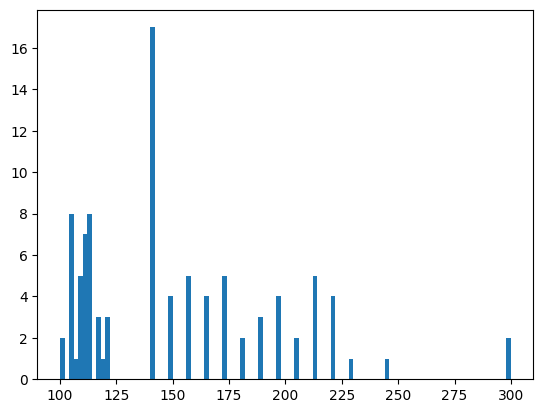

In [372]:
paypay_payoff = marged_df["PayPay_exchanged"].tolist()
paypay_task_num = set(paypay_payoff)
len(paypay_task_num)
import matplotlib.pyplot as plt
plt.hist(paypay_payoff, bins=100)
plt.show()

## 7/24実験結果について

グループわりを見つけ出す

In [373]:
# グループの割り振り
group_set = set(pg_df['crd_cost_information.1.group.id_in_subsession'])
print(group_set)

participant_group = {}
participant_unfullgrouped = {}
for gl in group_set:
    tmp_df = pg_df[pg_df['crd_cost_information.1.group.id_in_subsession'] == gl]
    grouped_label = list(tmp_df['participant.label'])
    if len(grouped_label) != 4:
        participant_unfullgrouped[gl] = grouped_label
    else:
        participant_group[gl] = grouped_label

# グループが割り振られ、4人が集まったグループとその参加者ラベル
print(participant_group)

# グループが割り振られたが、何らかの理由で4人集まらなかったグループとその参加者ラベル
print(participant_unfullgrouped)


{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27}
{2: [10022, 10035, 10058, 10060], 3: [10025, 10041, 10052, 10007], 4: [10026, 10059, 10095, 10023], 5: [10054, 10050, 10015, 10057], 6: [10001, 10082, 10049, 10056], 7: [10074, 10076, 10097, 10065], 8: [10068, 10070, 10045, 10078], 9: [10091, 10036, 10039, 10002], 10: [10005, 10027, 10089, 10020], 11: [10004, 10047, 10048, 10010], 12: [10062, 10014, 10084, 10092], 13: [10024, 10013, 10019, 10018], 14: [10033, 10094, 10061, 10081], 15: [10100, 10037, 10038, 10003], 16: [10012, 10077, 10032, 10028], 17: [10030, 10042, 10069, 10098], 18: [10031, 10016, 10053, 10021], 19: [10087, 10075, 10080, 10009], 20: [10034, 10066, 10046, 10099], 21: [10006, 10044, 10096, 10011], 22: [10085, 10073, 10083, 10086], 23: [10017, 10040, 10093, 10008], 24: [10051, 10029, 10072, 10063], 25: [10071, 10055, 10079, 10088]}
{1: [10064, 10090], 26: [10067], 27: [10043]}


In [374]:
# 4人グループが作れなかった人たちの原因
unfullgrouped_label = []
for v in participant_unfullgrouped.values():
    unfullgrouped_label += v

ungrouped_label_reason = [pg_df[pg_df['participant.label'] == ul]['participant.reason_finished']  for ul in unfullgrouped_label]
print(ungrouped_label_reason)

[36    あなたは確認問題に5回連続で失敗したので、実験は終了となります。
Name: participant.reason_finished, dtype: object, 57    あなたから制限時間以内に同意を得られなかったため、実験は終了となります。
Name: participant.reason_finished, dtype: object, 35    申し訳ありませんが、あなたとペアになる人が見つからず、グループを作成できませんでした。あなた...
Name: participant.reason_finished, dtype: object, 93    申し訳ありませんが、あなたとペアになる人が見つからず、グループを作成できませんでした。あなた...
Name: participant.reason_finished, dtype: object]


確認テストまで成功した人（successもしくはungrouped）

In [375]:
success_label = pg_df[pg_df['participant.completion_status'] == 'success']['participant.label'].tolist()
ungrouped_label = pg_df[pg_df['participant.completion_status'] == 'ungrouped']['participant.label'].tolist()
label = pg_df['participant.label'].tolist()

print(success_label)
print(ungrouped_label)

[10022, 10024, 10054, 10035, 10085, 10062, 10091, 10004, 10031, 10100, 10087, 10005, 10071, 10026, 10037, 10025, 10033, 10013, 10012, 10041, 10047, 10036, 10059, 10068, 10016, 10027, 10014, 10019, 10095, 10038, 10070, 10074, 10094, 10076, 10001, 10023, 10034, 10077, 10006, 10045, 10030, 10075, 10058, 10082, 10060, 10042, 10097, 10066, 10048, 10089, 10073, 10084, 10017, 10052, 10050, 10015, 10007, 10061, 10049, 10053, 10078, 10051, 10032, 10055, 10044, 10029, 10056, 10065, 10020, 10040, 10093, 10008, 10021, 10039, 10081, 10072, 10092, 10018, 10002, 10046, 10083, 10028, 10069, 10080, 10096, 10079, 10010, 10011, 10063, 10099, 10009, 10003, 10086, 10098, 10088]
[10067, 10043]


寄付した額について

In [376]:
# 寄付した額のカラムリスト
contribute_columns = [f'crd_cost_information.{i}.player.contribution' for i in range(1, 11)]

success_contribution = {}
for sl in success_label:
    row = pg_df[pg_df['participant.label'] == sl][contribute_columns]
    success_contribution[sl] = row.iloc[0].tolist()
print(success_contribution)

{10022: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 10024: [2, 4, 0, 2, 4, 0, 2, 4, 2, 4], 10054: [2, 4, 2, 4, 2, 2, 4, 2, 2, 4], 10035: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 10085: [4, 2, 4, 4, 4, 4, 4, 4, 4, 4], 10062: [2, 4, 2, 2, 2, 2, 2, 2, 2, 2], 10091: [2, 2, 2, 2, 2, 4, 2, 2, 2, 2], 10004: [4, 2, 2, 2, 2, 2, 2, 0, 2, 0], 10031: [2, 4, 4, 2, 2, 4, 2, 2, 4, 4], 10100: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 10087: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 10005: [4, 2, 4, 4, 4, 4, 2, 2, 2, 2], 10071: [4, 2, 2, 2, 2, 2, 4, 2, 2, 2], 10026: [4, 2, 4, 4, 4, 2, 2, 2, 0, 2], 10037: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 10025: [4, 2, 2, 2, 2, 2, 2, 2, 2, 2], 10033: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 10013: [0, 2, 4, 2, 2, 4, 4, 2, 2, 2], 10012: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 10041: [2, 4, 2, 2, 2, 2, 2, 2, 2, 2], 10047: [0, 0, 4, 0, 0, 0, 0, 4, 2, 0], 10036: [4, 4, 4, 4, 2, 2, 4, 4, 4, 4], 10059: [4, 4, 2, 4, 4, 4, 4, 2, 2, 2], 10068: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 10016: [4, 4, 4, 4, 4, 4, 4, 4, 0, 0], 10027: [2, 0, 0, 2, 4, 4

各グループと寄付額について

In [377]:
round_column = [f"Round {i}" for i in range(1, 11)]

dfs = {}
for g, labels in participant_group.items():
    part_contrib = []
    part_index = []
    for l in labels:
        try:
            part_contrib.append(success_contribution[l])
            part_index.append(l)
        except KeyError as e:
            print(f"{l}のキーが存在しません。（success_contributionに含まれていない->success_labelにいない->途中離脱？）")
    # print(part_contrib)
    df = pd.DataFrame(part_contrib, columns=round_column, index=part_index)
    dfs[g] = df
    # display(df)

10057のキーが存在しません。（success_contributionに含まれていない->success_labelにいない->途中離脱？）


各グループの目標額を探し出す

In [378]:
# ちゃんと4人集まったグループに限定する
group_target = {}
for g in participant_group.keys():
    group_target[g] = pg_df[pg_df['crd_cost_information.1.group.id_in_subsession'] == g]['crd_cost_information.1.group.target'].iloc[0]

print(group_target)

{2: 100, 3: 100, 4: 20, 5: 40, 6: 140, 7: 140, 8: 160, 9: 100, 10: 80, 11: 60, 12: 80, 13: 0, 14: 60, 15: 140, 16: 120, 17: 140, 18: 0, 19: 20, 20: 0, 21: 100, 22: 140, 23: 120, 24: 160, 25: 100}


グラフ描画：累積貢献額（積み上げグラフ）

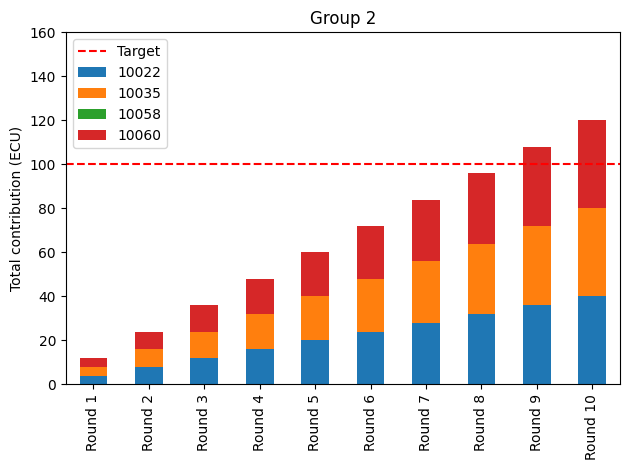

In [379]:
import matplotlib.pyplot as plt
import os
"""
縦軸は累計貢献額、横軸がラウンド数
1.貢献額は積み立て式にする
2.そのグループの目標額を示す
"""
def TotalContribution(groups: list):
    os.makedirs(f"{dir_path}/total_contribution", exist_ok=True)
    for g in groups:
        df = dfs[g].cumsum(axis=1)
        df = df.T
        ax = df.plot(kind='bar', stacked=True)
        plt.axhline(y=group_target[g], color='red', linestyle='--', label='Target')
        plt.title(f"Group {g}")
        plt.ylim(0, 160)
        plt.ylabel("Total contribution (ECU)")
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"{dir_path}/total_contribution/Group_{g}.png")
        plt.show()
        break

TotalContribution(participant_group.keys())

グラフ描画：１ラウンドあたりの寄付額（折れ線グラフ）

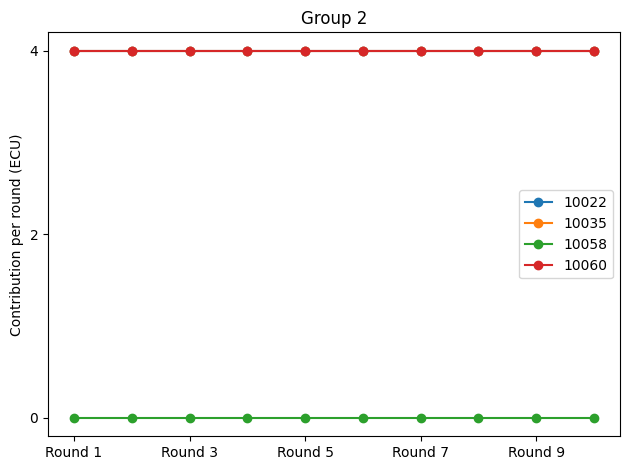

In [380]:
import os
def ContributionPerRound(groups: list):
    os.makedirs(f"{dir_path}/contribution_per_round", exist_ok=True)
    for g in groups:
        df = dfs[g]
        df = df.T
        ax = df.plot(kind='line', marker='o')
        plt.title(f"Group {g}")
        ax.set_yticks([0, 2, 4])
        plt.ylabel("Contribution per round (ECU)")
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"{dir_path}/contribution_per_round/Group_{g}")
        plt.show()
        break

ContributionPerRound(participant_group.keys())

目標達成したグループ、そうでないグループ

In [381]:
target_success_group = []
target_failed_group = []

for g in participant_group.keys():
    group_mem = pg_df[pg_df['crd_cost_information.1.group.id_in_subsession'] == g].iloc[0]
    if group_mem['crd_cost_information.10.group.failed'] == 0:
        target_success_group.append(g)
    else:
        target_failed_group.append(g)

print(target_success_group, target_failed_group)

[2, 4, 5, 9, 10, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23] [3, 6, 7, 8, 11, 16, 17, 24, 25]


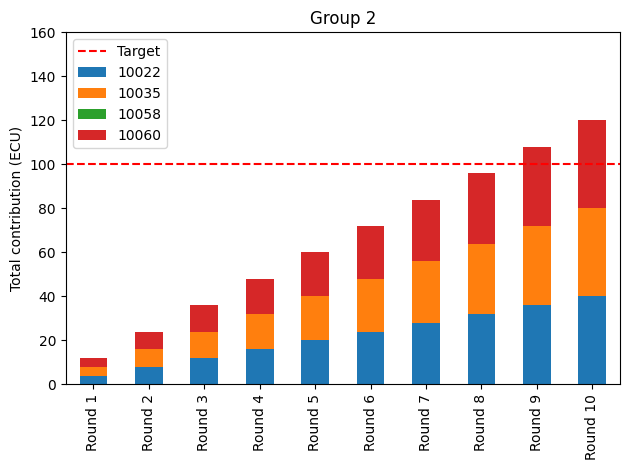

In [382]:
TotalContribution(target_success_group)

各グループの参加者の提案額

In [383]:
# dictに,labelをkeyとして、valueには[group, round1_pledge, round6_pledge]とする
participant_pledges = {}
for g in participant_group.keys():
    # 1ラウンドと6ラウンドの提案額
    pledges_df = pg_df[pg_df['crd_cost_information.1.group.id_in_subsession'] == g][['participant.label','crd_cost_information.1.player.pledge', 'crd_cost_information.6.player.pledge']]

    for index, row in pledges_df.iterrows():
        participant_pledges[int(row['participant.label'])] = [g, row['crd_cost_information.1.player.pledge'], row['crd_cost_information.6.player.pledge']]
    
print(participant_pledges)

{10022: [2, 10.0, 100.0], 10035: [2, 100.0, 100.0], 10058: [2, 0.0, 0.0], 10060: [2, 160.0, 160.0], 10025: [3, 0.0, 20.0], 10041: [3, 10.0, 20.0], 10052: [3, 50.0, 10.0], 10007: [3, 5.0, 5.0], 10026: [4, 50.0, 160.0], 10059: [4, 140.0, 140.0], 10095: [4, 160.0, 120.0], 10023: [4, 100.0, 100.0], 10054: [5, 90.0, 90.0], 10050: [5, 160.0, 20.0], 10015: [5, 160.0, 160.0], 10057: [5, 20.0, 120.0], 10001: [6, 50.0, 20.0], 10082: [6, 160.0, 160.0], 10049: [6, 160.0, 160.0], 10056: [6, 30.0, 60.0], 10074: [7, 80.0, 80.0], 10076: [7, 100.0, 80.0], 10097: [7, 20.0, 40.0], 10065: [7, 30.0, 40.0], 10068: [8, 80.0, 100.0], 10070: [8, 160.0, 160.0], 10045: [8, 100.0, 120.0], 10078: [8, 100.0, 100.0], 10091: [9, 5.0, 10.0], 10036: [9, 6.0, 100.0], 10039: [9, 50.0, 2.0], 10002: [9, 160.0, 160.0], 10005: [10, 140.0, 120.0], 10027: [10, 50.0, 50.0], 10089: [10, 120.0, 120.0], 10020: [10, 25.0, 100.0], 10004: [11, 100.0, 80.0], 10047: [11, 10.0, 20.0], 10048: [11, 80.0, 80.0], 10010: [11, 100.0, 80.0], 1

グラフ描画：提案額も盛り込んだグラフ

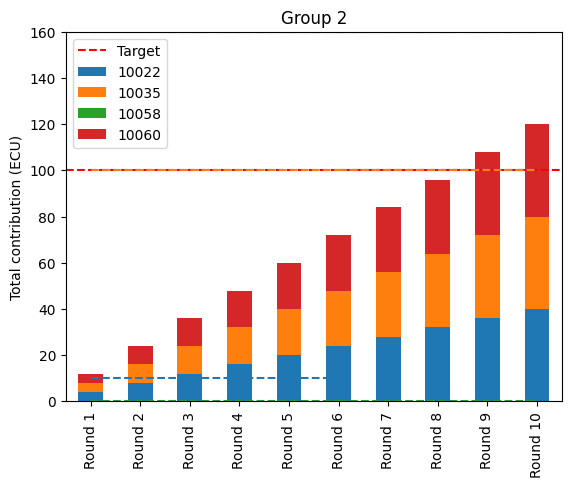

In [384]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for g, labels in participant_group.items():
    df = dfs[g].cumsum(axis=1)
    df = df.T
    ax = df.plot(kind='bar', stacked=True)
    plt.axhline(y=group_target[g], color='red', linestyle='--', label='Target')
    plt.legend()
    # 各参加者の提案額を加える
    for i, l in enumerate(labels):
        r1_pledge = participant_pledges[l][1]
        r6_pledge = participant_pledges[l][2]
        plt.plot([0, 5], [r1_pledge, r1_pledge], color=colors[i], linestyle='--', label=f'{l}_predges')
        plt.plot([5, 9], [r6_pledge, r6_pledge], color=colors[i], linestyle='--', label=f'{l}_predges')
    plt.title(f"Group {g}")
    plt.ylim(0, 160)
    plt.ylabel("Total contribution (ECU)")
    # plt.legend()
    plt.show()
    break

ブラックリストの作成

In [390]:
blacklist = task_list_df[8].tolist()
print(blacklist)
import csv
with open(f"{dir_path}/blacklist.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(blacklist)

[1234268403, 1235779098, 1232483825, 1234979671, 1225026867, 1236215554, 1231135398, 1236639019, 1235796006, 1233320619, 1236244087, 1231326128, 1232695336, 1226012587, 1234936627, 1233703347, 1236917343, 1238730992, 1238059725, 1232023342, 1230685489, 1225659254, 1226954468, 1225206830, 1231042368, 1233580936, 1232400350, 1237715604, 1226897401, 1234279629, 1239195574, 1232465514, 1224965217, 1234626572, 1225160503, 1235958199, 1236905658, 1229808196, 1232525631, 1235283592, 1237718446, 1227288712, 1232067415, 1238339034, 1232170440, 1233480358, 1231011051, 1233851163, 1231689154, 1229150254, 1227453145, 1234320378, 1233206850, 1230299791, 1231968175, 1235295376, 1236634282, 1229042491, 1231775271, 1226412045, 1231245796, 1230681487, 1232711695, 1234349033, 1234062932, 1235088193, 1235389680, 1233428845, 1234426211, 1236580513, 1238336630, 1235488222, 1232286019, 1231327446, 1237833663, 1231020179, 1238725410, 1229150412, 1236466224, 1236657678, 1235348272, 1229471408, 1234602695, 123